<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/FuzzyControllerEx_DC_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [107]:
#add control about SET VALUE and TEMP-SENSOR-VALUE
set_value = ctrl.Antecedent(np.arange(16,30,0.1),'set_value')
sensor_value = ctrl.Antecedent(np.arange(0,40,0.1),'sensor_value')

In [108]:
#output is the PWM and FREQUENCY 
volt = ctrl.Consequent(np.arange(0,255,0.1),'volt')


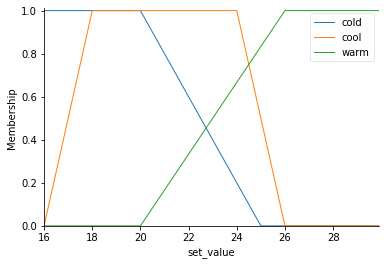

In [109]:
set_value['cold']=fuzz.trapmf(set_value.universe,[16,16,20,25])
set_value['cool']=fuzz.trapmf(set_value.universe,[16,18,24,26])
set_value['warm']=fuzz.trapmf(set_value.universe,[20,26,30,30])

set_value.view()

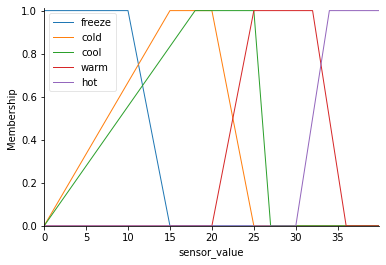

In [110]:
sensor_value['freeze'] = fuzz.trapmf(sensor_value.universe,[0,0,10,15])
sensor_value['cold'] = fuzz.trapmf(sensor_value.universe,[0,15,20,25])
sensor_value['cool'] = fuzz.trapmf(sensor_value.universe,[0,18,25,27])
sensor_value['warm'] = fuzz.trapmf(sensor_value.universe,[20,25,32,36])
sensor_value['hot'] = fuzz.trapmf(sensor_value.universe,[30,34,40,40])

sensor_value.view()

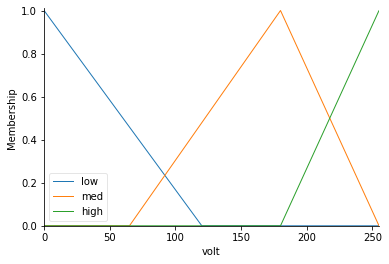

In [111]:
#Create membership graph for output
volt['low'] = fuzz.trimf(volt.universe,[0,0,120])
volt['med'] = fuzz.trimf(volt.universe,[65,180,255])
volt['high'] = fuzz.trimf(volt.universe,[180,255,255])

volt.view()

In [112]:
#set rules for ctrl
rule1=ctrl.Rule(set_value['cold']&sensor_value['freeze'],volt['med'])
rule2=ctrl.Rule(set_value['cold']&sensor_value['cold'],volt['low'])
rule3=ctrl.Rule(set_value['cold']&sensor_value['cool'],volt['low'])
rule4=ctrl.Rule(set_value['cold']&sensor_value['warm'],volt['high'])
rule5=ctrl.Rule(set_value['cold']&sensor_value['hot'],volt['high'])

rule6=ctrl.Rule(set_value['cool']&sensor_value['freeze'],volt['high'])
rule7=ctrl.Rule(set_value['cool']&sensor_value['cold'],volt['low'])
rule8=ctrl.Rule(set_value['cool']&sensor_value['cool'],volt['low'])
rule9=ctrl.Rule(set_value['cool']&sensor_value['warm'],volt['med'])
rule10=ctrl.Rule(set_value['cool']&sensor_value['hot'],volt['high'])

rule11=ctrl.Rule(set_value['warm']&sensor_value['freeze'],volt['high'])
rule12=ctrl.Rule(set_value['warm']&sensor_value['cold'],volt['high'])
rule13=ctrl.Rule(set_value['warm']&sensor_value['cool'],volt['med'])
rule14=ctrl.Rule(set_value['warm']&sensor_value['warm'],volt['low'])
rule15=ctrl.Rule(set_value['warm']&sensor_value['hot'],volt['low'])


In [113]:
#begin training, how many rules much tell
powering_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
powering = ctrl.ControlSystemSimulation(powering_control)

In [124]:
#input for testing
powering.input['set_value'] = 20
powering.input['sensor_value'] = 30

179.1000298186257


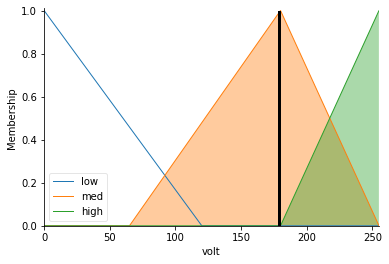

In [125]:
powering.compute()
print(powering.output['volt'])
volt.view(sim=powering)